In [444]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [445]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(
    n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7
)

In [446]:
X.shape

(2000, 2)

In [447]:
X

array([[-2.69823941,  1.3454702 ],
       [-2.87459835,  1.8097575 ],
       [ 0.96077126,  1.17046777],
       ...,
       [-2.80303543,  2.72948115],
       [ 0.24057359,  2.40103109],
       [-2.63807768,  1.95621065]])

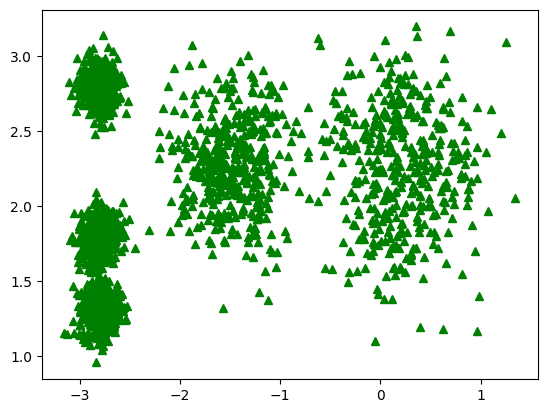

In [448]:
plt.plot(X[:, 0],X[:, 1], 'g^')

# the way Kmeans works is it repeats the following steps:

    1.we assign a centroid (randomly)

    2.we assign the nearest data point to the centroid to the cluster

    3.re-assign the centroid, giving it the value of the mean of the data points of that cluster

In [449]:
from sklearn.cluster import KMeans

In [450]:
kmeans=KMeans(n_clusters=5,n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=5, n_init='auto')

In [451]:
kmeans.labels_

array([4, 2, 1, ..., 0, 1, 2])

In [452]:
set(kmeans.labels_)

{0, 1, 2, 3, 4}

In [453]:
set(y)

{0, 1, 2, 3, 4}

In [454]:
a = np.array([[-3, 1.2], [-3, 2], [-1.5, 2.2]])

In [455]:
kmeans.predict(a)

array([4, 2, 3])

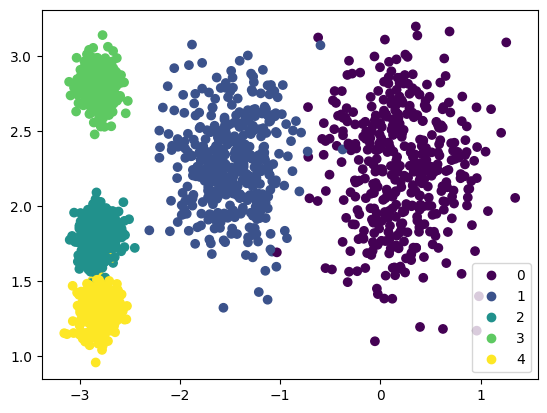

In [456]:
s=plt.scatter(X[:, 0],X[:, 1],c=y)
plt.legend(handles=s.legend_elements()[0],labels=set(y))

ignore this plot i used it to verify the predictions manually

    inertia is a value used to know the efficiency of our clustering

In [457]:
kmeans.inertia_

211.59853725816836

    we can use the elbow method

In [458]:
inertia_values=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init='auto')
    km.fit_predict(X)
    inertia_values.append(km.inertia_)
inertia_values

[3534.8360871670793,
 1149.6140723750275,
 677.2510196401769,
 261.7967778569471,
 219.83857990071823,
 169.64033930193963,
 168.48567375125313,
 119.65981252879045,
 102.77888340740611,
 100.25428013338778]

([<matplotlib.axis.XTick at 0x1c698583bd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

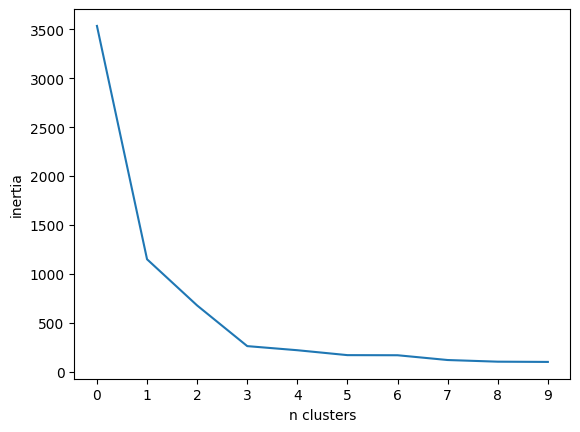

In [459]:
plt.plot(inertia_values)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.xticks([i for i in range(0,10)])

    the elbow points in this case is 3 the inertia's evolution becomes linear from there

    the silhouette score is a value between -1 and 1 used to determine a value's similrity compared to the cluster it's in and other clusters

In [460]:
silhouette_values=[]
for i in range(2,11):
    km=KMeans(n_clusters=i,n_init='auto')
    km.fit_predict(X)
    silhouette_values.append(silhouette_score(X,km.fit_predict(X)))
silhouette_values

[0.5966442557582528,
 0.5723900247411775,
 0.688531617595759,
 0.655517642572828,
 0.6021101618281359,
 0.587761887032505,
 0.559927730752507,
 0.5561045716370053,
 0.5592403733304294]

([<matplotlib.axis.XTick at 0x1c698548d10>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

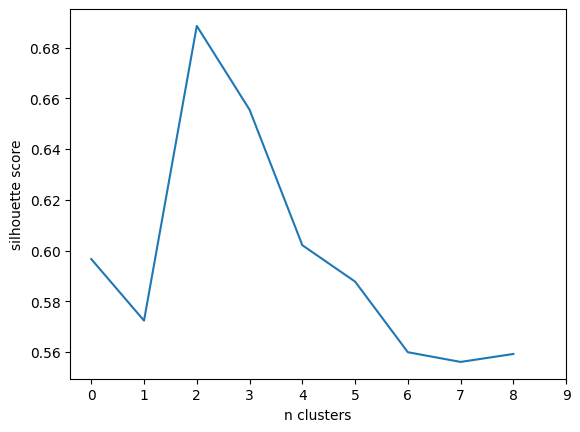

In [461]:
plt.plot(silhouette_values)
plt.xlabel("n clusters")
plt.ylabel("silhouette score")
plt.xticks([i for i in range(0,10)])

    apparently the optimal number of clusters is 2 haha

# there is another picture in the folder called pic.jpg just ignore i used it for testing

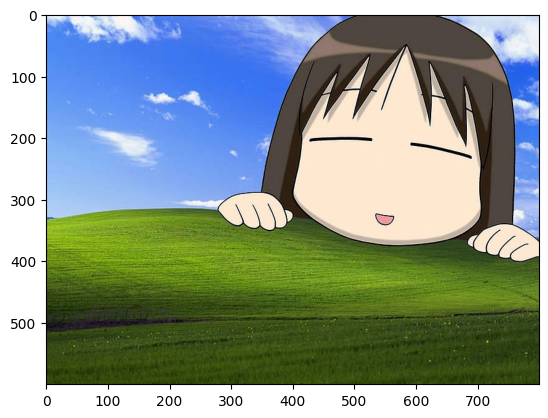

In [504]:
img=plt.imread("pic2.jpg")
plt.imshow(img)

In [505]:
imgres=img.shape
imgres

(600, 800, 3)

In [506]:
img=img.reshape((-1,3))

In [507]:
#img=np.float32(img)

In [508]:
img.shape

(480000, 3)

In [509]:
kmIMG=KMeans(n_clusters=3)
kmIMG.fit(img)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [510]:
labels=kmIMG.labels_

In [511]:
set(labels)

{0, 1, 2}

In [512]:
centers=np.array(kmIMG.cluster_centers_,dtype='uint8')
centers

array([[103, 149, 240],
       [ 74,  91,  31],
       [238, 226, 213]], dtype=uint8)

In [513]:
segmented_values=centers[labels]
segmented_img=segmented_values.reshape((imgres))

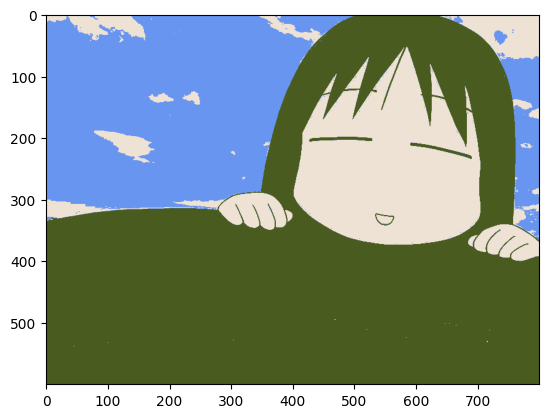

In [514]:
plt.imshow(segmented_img)

In [515]:
imgs=[]
for i in range(1,10):
    kmIMG=KMeans(n_clusters=i)
    kmIMG.fit(img)
    labels=kmIMG.labels_
    centers=np.array(kmIMG.cluster_centers_,dtype='uint8')
    segmented_values=centers[labels]
    segmented_img=segmented_values.reshape((imgres))
    imgs.append(segmented_img)
imgs=np.array(imgs)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

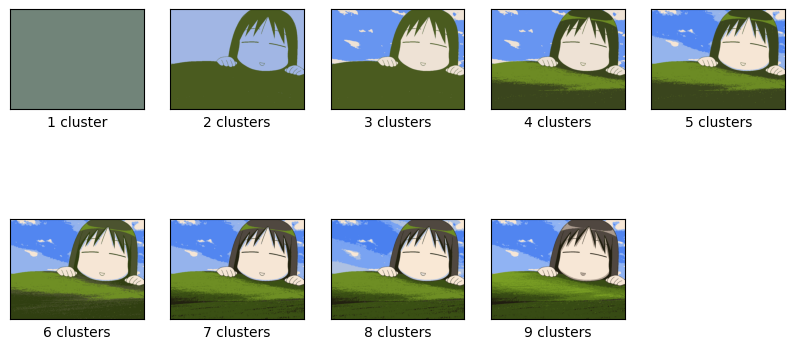

In [516]:
plt.figure(figsize=(10,5))
for i in range(1, len(imgs) + 1):
    plt.subplot(2, 5, i)
    plt.imshow(imgs[i - 1])
    if i==1:
        plt.xlabel(str(i) + " cluster")    
    else:
        plt.xlabel(str(i) + " clusters")
    plt.yticks([])
    plt.xticks([])